
# Homework 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


These are suggested practice problems and are not to be submitted.


The problems in this notebook serve as an introduction to fundamental "Greeks" of Black-Scholes.


At the bottom of this notebook is a collection of functions that can be used to calculate the Greeks of a Call/Put Option.

## Notation:

In this homework set assume the standard Black-Scholes assumptions on the distribution $S_t$ of a stock path end points at a time $t>0$.

**Remark**: In the lectures we have been writing $S(t)$ for $S_t$. We will now switch to using $S_t$ to make notation in the Black-Scholes world more digestiable. 

**Black-Scholes Formulas**: If $C_t$ and $P_t$ are the distribution of payoffs of a call and put option with strike price $K$ that expires at time $t$ then

$$
C_0 = e^{-rt} \mathbb{E}[C(t)] = S_0\Phi(d_1) - K e^{-rt}\Phi(d_2),
$$

$$
P_0 = e^{-rt} \mathbb{E}[P(t)] = -S_0\Phi(-d_1) + K e^{-rt}\Phi(-d_2),
$$
where

$$
d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)t}{\sigma \sqrt{t}}, \qquad
d_2 = d_1 - \sigma\sqrt{t}
$$
and $\Phi$ is the cummulative distribution function of the standard normal distribution $\mathcal{N}(0,1)$.


**Delta**

The *delta* of the call and put options at time $t=0$ are the rates of change of $C_0$ and $P_0$ with respect to the price of the underlying spot price $S_0$:

$$\Delta_{C_0}:=\frac{\partial C_0}{\partial S_0} = \Phi(d_1) \quad \mbox{and}\quad \Delta_{P_0}:=\frac{\partial C_0}{\partial S_0} = \Phi(d_1)-1.$$


**Remark**: At the bottom of this notebook are functions written out in the lectures for the Black-Scholes call and put prices as well as the deltas.


### Exercise 1

Let $C_0$ and $P_0$ be the Black-Scholes prices of a call and put option at time $0$ that have identical time to expiration $t$ and strike price $K$. Show that if the risk-free interest rate is assumed to be $0$, then $C_0=P_0$.

I'm not sure this is true.. 

$\left. C_0\right|_{r=0}\ \sqrt{2\pi} = S_0 \int_{-\infty}^{d_1} dx\ e^{x^2/2} - K \int_{-\infty}^{d_2}dx\ e^{x^2/2} $   
$\left. P_0\right|_{r=0}\ \sqrt{2\pi} = -S_0 \int_{-\infty}^{-d_1} dx\ e^{x^2/2} + K \int_{-\infty}^{-d_2}dx\ e^{x^2/2} $   
Then we have:
\begin{align}
   \sqrt{2\pi}\left( C_0 - P_0 \right)_{r=0} &= S_0 \left[ \int_{-\infty}^{d_1} dx\ e^{x^2/2} - \int_{-\infty}^{-d_1} dx\ e^{x^2/2} \right] + K\left[ -\int_{-\infty}^{d_2}dx\ e^{x^2/2} + \int_{-\infty}^{-d_2}dx\ e^{x^2/2} \right]\\
    &= S_0 \int_{-d1}^{d_1} dx\ e^{x^2/2} - K \int_{-d2}^{d_2}dx\ e^{x^2/2}
\end{align}
   
This value is only $0$ if $d_{1,2} = -d_{1,2} \implies d_{1,2}=0$ but setting $r=0$ doesn't imply $d_{1,2}=0$

### Exercise 2 

Verify the Black-Scholes equations for the delta of a call and put option. (Most of this was done in the lecture, but double check the algebra does indeed work out so that there is enough cancelation in the partial derivative computation so that $\Delta_{C_0}$ simplifies to $\Phi(d_1)$.)

### Exercise 3

Let $C_0$ be the Black-Scholes price of an at-the-money call option. Show that 

$$\frac{\partial C_0}{\partial S_0}>\frac{1}{2} \quad \mbox{and} \quad \frac{\partial P_0}{\partial S_0}<-\frac{1}{2}$$ and

$$ \lim_{t\to 0^+} \frac{\partial C_0}{\partial S_0} = \frac{1}{2} \quad \mbox{and} \quad \lim_{t\to 0^+} \frac{\partial P_0}{\partial S_0} = -\frac{1}{2}.$$



These relation are compeltely dependent on how $\Phi(d_1)$ behaves at the money as a function of $t$    

At the money, we have $S_0 = K$, which means $\ln(S_0/K) = 0$, so that
\begin{equation}
    d_1 = \frac{0 + (r+ \sigma^2)\ \dfrac{t}{2}} {\sigma\ \sqrt{t}} = \frac{r\ \sqrt{t}}{\sigma} + \frac{1}{2}\sigma\ \sqrt{t} \geq 0
\end{equation}

This is strictly greater than $0$ when $\sigma$, $r$ and $t$ are strictly greater than 0. When $t\to 0^+$, we get $d_1 \to 0^+$  

Since $\Delta_{C_0} = \Phi(d_1)$, and $\Phi(x) > 1/2$ for $x>0$ and $\Phi(x) = 1/2$ for $x=0$, the inequalities in the question are proved for Call options.   

For the put option, $\Delta_{P_0} = \Phi(d_1) - 1$, the logic works the same in the case of $t \to 0^+$. However, the inequality in the question for $t>0$ should be reversed, $X - 1 > -\frac{1}{2}\quad \forall\  X \in (1/2,1]$


### Exercise 4

The **Gamma** of a call and put options is the rate of change of the deltas with respect to $S_0$, i.e.,

$$\Gamma_{C_0} := \frac{\partial \Delta_{C_0}}{\partial S_0} = \frac{\partial^2C_0}{\partial S_0^2} \quad \mbox{and} \quad \Gamma_{P_0} := \frac{\partial \Delta_{P_0}}{\partial S_0} = \frac{\partial^2P_0}{\partial S_0^2}.$$

Show that

$$\Gamma_{C_0} = \Gamma_{P_0} = \frac{\varphi(d_1)}{S_0\sigma\sqrt{t}}$$
where $\varphi(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}}$ is the probability density function of the standard normal distribution $\mathcal{N}(0,1)$.

We have:   
\begin{equation}
    \Gamma_{C_0} =  \frac{\partial \Delta_{C_0}}{\partial S_0} = \frac{\partial \Phi}{\partial d_1} \frac{\partial d_1}{\partial S_0} = \varphi(d_1) \frac{\dfrac{1}{S_0/K}\dfrac{1}{K}}{\sigma\ \sqrt{t}} = \frac{\varphi(d_1)}{S_0\ \sigma\ \sqrt{t}}\quad \blacksquare
\end{equation}

As for the puts.
\begin{equation}
    \Gamma_{P_0} = \frac{\partial \Delta_{P_0}}{\partial S_0} = \frac{\partial}{\partial S_0}\left( \Delta_{C_0} - 1 \right) = \Gamma_{C_0}\quad \blacksquare
\end{equation}

### Exercise 5

Let $C$ be a call option with strike price $K$ and time-to-expiration $t$. Let $C'$ be a call with strike price $K'$ and time to expiration $t'$. 

   a) Assume that $K=K'$ and $t>t'$. Show that $\Gamma_{C_0}<\Gamma_{C_{0}'}$. 
   
       - What does this imply about the Black-Scholes value of a call option that is near to expiration?
        
   b) Assume that $S_0\geq K\geq K'$ and $t = t'$. Show that $\Gamma_{C_0}<\Gamma_{C_0'}$.
   
       - What does this imply about the Black-Scholes value of a call option whose strike price is near the spot price?
       
   c) Explore the behavior of $\Gamma$ for options that are near to being in-the-money. What are you able to imply about the behavior of the Black-Scholes value of an option that is near to being in-the-money?

### a)

   

We want to find $\Gamma_{C_0} < \Gamma_{C_0^\prime}$   
\begin{equation}
    \Gamma - \Gamma^\prime = \frac{1}{S_0\ \sigma}\left( \frac{\varphi(d_1) - \varphi(d_1^\prime)}{\sqrt{t} - \sqrt{t^\prime}} \right)\ .
\end{equation}   

Now, looking at the denominator, if $t > t^\prime$, the denominator is always positive. However, the numerator actually carries a nontrivial sign dependence.   
   
The demonstration of this can be seen in the plots below.

Text(0.5, 0, '$t^\\prime$')

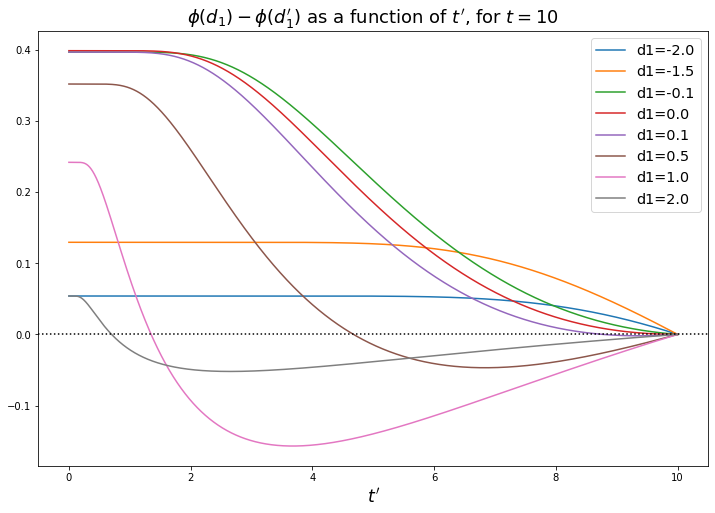

In [163]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

#sigma = 1, r = 0, doesn't change the behavior in t if r>0
def d(lgS_K,t):
    return lgS_K/np.sqrt(t) + np.sqrt(t)/2
t1 = 10
d1 = np.array([-2.0,-1.-0.5,-0.1,0.0,0.1,0.5,1.0,2.0])
lgS_K = np.sqrt(t1)*d1 - t1/2

t_prime = np.linspace(0.0001,t1,10000)
d1_prime = np.array([d(SK,t_prime)for SK in lgS_K])

fig,ax = plt.subplots(1,1,figsize=(12,8))
for i,d in enumerate(d1_prime):
        dif = stats.norm.pdf(d1[i])-stats.norm.pdf(d)
        ax.plot(t_prime,dif,label='d1={:.1f}'.format(d1[i]))
    
ax.axhline(0,color='k',linestyle=':')
ax.legend(loc='upper right',fontsize='x-large')
ax.set_title(r'$\phi(d_1) - \phi(d_1^\prime)$ as a function of $t^\prime$, for $t={}$'.format(t1),fontsize=18)
ax.set_xlabel(r'$t^\prime$',fontsize='xx-large')

### a cont'd

So, there is quite a non-triial dependence on $t^\prime$ deciding whether $\Gamma$ or $\Gamma^\prime$ is larger. However, for sure as $t^\prime$ gets closer to expiration, $\Gamma^\prime$ becomes constant decided by $\ln{S_0/K}$ (which determines different $d_1$ values) and with $\Gamma>\Gamma^\prime$

# b)   

Text(0.5, 0, '$\\ln(S/K^\\prime$)')

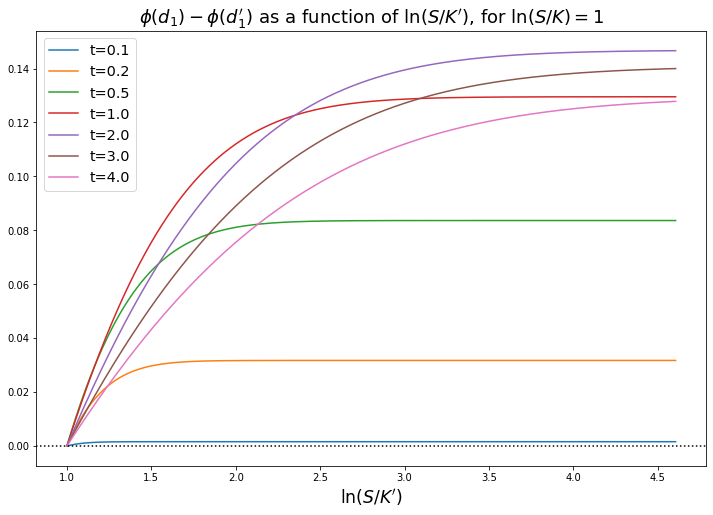

In [186]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

#sigma = 1, r = 0, doesn't change the behavior in t if r>0
def d(lgS_K,t):
    return lgS_K/np.sqrt(t) + np.sqrt(t)/2
lgS_K = 1
t = [0.1,0.25,0.5,1,2,3,4]
d1 = d(lgS_K,t)

lgS_K_prime = np.linspace(lgS_K,lgS_K*np.log(100),10000)
d1_prime = np.array([d(lgS_K_prime,tt) for tt in t])

fig,ax = plt.subplots(1,1,figsize=(12,8))
for i,d in enumerate(d1_prime):
        dif = stats.norm.pdf(d1[i])-stats.norm.pdf(d)
        ax.plot(lgS_K_prime,dif,label='t={:.1f}'.format(t[i]))
    
ax.axhline(0,color='k',linestyle=':')
ax.legend(loc='best',fontsize='x-large')
ax.set_title(r'$\phi(d_1) - \phi(d_1^\prime)$ as a function of $\ln(S/K^\prime$), for $\ln(S/K)={}$'.format(lgS_K),fontsize=18)
ax.set_xlabel(r'$\ln(S/K^\prime$)',fontsize='xx-large')

Here we find, for all choices of $K$, that $\Gamma >\Gamma^\prime$

### Exercise 6

The **vega** of a call and put option is the rate of change of $C_0$ and $P_0$ with respect to volatility $\sigma$:

$$\nu_{C_0} =\frac{\partial C_0}{\partial \sigma}\quad \mbox{and} \quad \nu_{P_0} = \frac{\partial P_0}{\partial \sigma}.$$

Show that

$$\nu_{C_0} = \nu_{P_0} = S_0\sqrt{t}\varphi(d_1).$$

**Hint**: Similar to the computation of $\Delta$, the identity $S_0\varphi(d_1) = Ke^{-rt}\varphi(d_2)$ will be useful in your computation.

### Exercise 7

Explore the behavior of $\nu_{C_0}$ and $\nu_{P_0}$ for calls and puts that are in-the-money, at-the-money, and out-of-the-money. What are able to conclude about the behavior of the Black-Scholes Option prices?

### Exercise 8

The **theta** of a call and put option is the rate of change of $C_0$ and $P_0$ with respect to time $t$:

$$\Theta_{C_0} = \frac{\partial C_0}{\partial t}\quad \mbox{and}\quad \Theta_{P_0} = \frac{\partial P_0}{\partial t}.$$

Show that

$$\Theta_{C_0} = - \frac{S_0\varphi(d_1)\sigma}{2\sqrt{t}} - rKe^{-rt}\Phi(d_2)$$
and

$$\Theta_{C_0} = - \frac{S_0\varphi(d_1)\sigma}{2\sqrt{t}} + rKe^{-rt}\Phi(-d_2).$$

## Exercise 9

What do you observe about $\Theta_{C_0}$ and $\Theta_{P_0}$ when time-to-expiration is near $0$. What does this imply about the value of an option that is near to expiration?

**Hint**: When $t$ is near $0$ then $rKe^{-rt}\Phi(d_2)$ and $rKe^{-rt}\Phi(-d_2)$ are quite small and cannot a value too much bigger than $rK$. So you can understand behavior of $\Theta_{C_0}$ and $\Theta_{P_0}$ when $t$ is near $0$ by understanding behavior of $- \frac{S_0\varphi(d_1)\sigma}{2\sqrt{t}}$ when $t$ is near $0$.

### Exercise 10

The **rho** of a call and put options is the rate of change of $C_0$ and $P_0$ with respect to the interest risk-free interest rate $r$:

$$\rho_{C_0}:= \frac{\partial C_0}{\partial r}\quad \mbox{and} \quad \rho_{P_0}:= \frac{\partial P_0}{\partial r}.$$

Show that

$$\rho_{C_0} = te^{-rt}K\Phi(d_2)$$
and
$$\rho(P_0) = -te^{-rt}K\Phi(-d_2).$$

### Exercise 11

Explore the behavior of $\rho_{C_0}$ and $\rho_{P_0}$ when $t\gg 0$. What can you conclude about the impact of changes of risk-free-interest rate on options that are not close to expiration?

In [69]:
import numpy as np
from scipy.stats import norm



##Below are functions that can be used to find Black-Scholes Greeks of European Call and Put Options.


def bs_call(S0, K, sigma, t, r = 0):
    """
    Computes the Black-Scholes price of a European call option.

    Parameters:
        S0 (float): Current asset price
        K (float): Strike price
        sigma (float): Annualized volatility (standard deviation of log returns)
        t (float): Time to expiration (in years)
        r (float): Risk-free interest rate (annualized)

    Returns:
        float: Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    
    call_price = S0*norm.cdf(d1) - K*np.exp(-r*t)*norm.cdf(d2)
    return call_price


def bs_put(S0, K, sigma, t, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    
    put_price = -S0*norm.cdf(-d1) + K*np.exp(-r*t)*norm.cdf(-d2)
    return put_price
    
    
       


def bs_call_delta(S0, K, sigma, t, r):
    """
    Returns the Delta (sensitivity to spot price) of a European call option
    under Black-Scholes assumptions.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Delta of Call Option
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return norm.cdf(d1)


def bs_put_delta(S0, K, sigma, t, r):
    """
    Returns the Delta (sensitivity to spot price) of a European put option
    under Black-Scholes assumptions.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Delta of Put Option
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return norm.cdf(d1) - 1.



def bs_gamma(S0,K,sigma,t,r):
    """
    Returns the Gamma (second order rate of change with respect to spot price) of a European call and put options
    under Black-Scholes assumptions.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Gamma of Call and Put Option
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    
    return norm.pdf(d1)/(S0*sigma*np.sqrt(t))


def bs_vega(S0,K,sigma,t,r):
    """
    Returns the vega (rate of change with respect to volatility) of a European call and put options
    under Black-Scholes assumptions.
    
    To express vega as a percentage change, divide return by 100.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Vega of Call and Put Option
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    
    return S0*norm.pdf(d1)*np.sqrt(t)


def bs_call_theta(S0,K,sigma,t,r):
    """
    Returns the theta (rate of change with respect to time) of a European call option
    under Black-Scholes assumptions.
    
    
    To give daily theta, divide return by 252.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Theta of Call option
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    
    return (-S0*norm.pdf(d1)*sigma)/(2*np.sqrt(t)) - r*K*np.exp(-r*t)*norm.cdf(d2)


def bs_put_theta(S0,K,sigma,t,r):
    """
    Returns the theta (rate of change with respect to time) of a European put option
    under Black-Scholes assumptions.
    
    
    To give daily theta, divide return by 252.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Theta of Put option
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    
    return (-S0*norm.pdf(d1)*sigma)/(2*np.sqrt(t)) + r*K*np.exp(-r*t)*norm.cdf(-d2)


def bs_call_rho(S0,K,sigma,t,r):
    """
    Returns the rho (rate of change with respect to risk-free interest) of a European call option
    under Black-Scholes assumptions.
    

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Rho of call option
    """
    
    d1 = (np.log(S0/K) + (r + 0.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    
    return K*t*np.exp(-r*t)*norm.cdf(d2)


def bs_put_rho(S0,K,sigma,t,r):
    """
    Returns the rho (rate of change with respect to risk-free interest) of a European put option
    under Black-Scholes assumptions.
    

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Rho of put option
    """
    
    d1 = (np.log(S0/K) + (r + 0.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    
    return -K*t*np.exp(-r*t)*norm.cdf(-d2)

